# <font color = tomato>Understanding AECIT and LogHub Templates

In [6]:
import pandas as pd
# Set display option to show the full length of the column
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## <font color = green> Summary

#### 1 Raw File

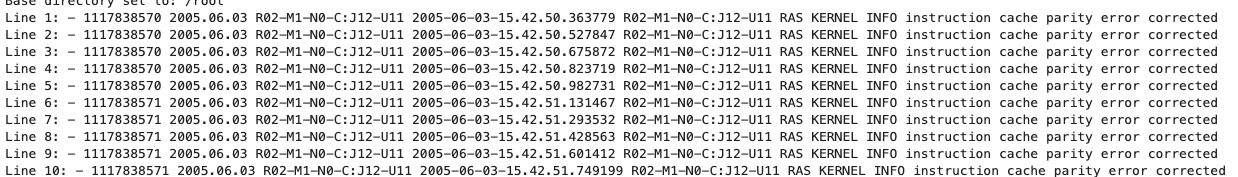

#### 2. Matching with Template File --> Look at Line 189

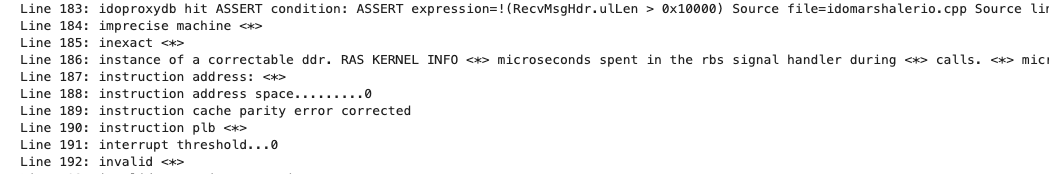

#### 3. Parsed File

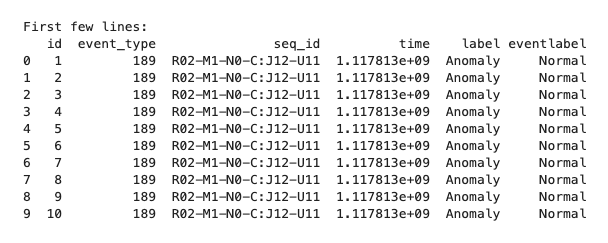

><font color = tomato>**In essence, the raw log flagged this as normal, whereas the parser flagged this as an alert**
    
Once a template matches, the parser extracts the relevant parts of the log line and assigns them to predefined fields. Here's how it's done for the matching template:

* id: The unique identifier for each log entry (incremental).

* event_type: The ID of the matching template (in this case, 189).

* seq_id: Sequence ID extracted from the log line (R02-M1-N0-C:J12-U11).

* time: The timestamp converted to epoch time (1.117813e+09).

* label: Determined based on the log entry (Anomaly, since it's explicitly marked as an error in this case).

* eventlabel: Extracted from the raw log line (Normal, because the event is a known and handled error).

---

## <font color = blue> 1. Raw Data

In [3]:
import os
import gzip

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

# Define the file path
file_path = os.path.join(base_dir, '11.Data/01.BGL/01.Raw_CFDR/bgl2.gz')

# Load and read the first 10 lines of the data
with gzip.open(file_path, 'rt') as f:
    lines = [next(f).strip() for _ in range(10)]

# Print the first 10 lines to understand the structure
for i, line in enumerate(lines, start=1):
    print(f"Line {i}: {line}")

Base directory set to: /root
Line 1: - 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.363779 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
Line 2: - 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.527847 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
Line 3: - 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.675872 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
Line 4: - 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.823719 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
Line 5: - 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.982731 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
Line 6: - 1117838571 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.51.131467 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected
Line 7: - 1117838571 2005.06.03 R02

## <font color = blue> 2. AECIT Templates

In [9]:
import os

# Determine the base directory based on the effective user ID
if os.geteuid() == 0:  # root user
    base_dir = '/root'
else:
    base_dir = '/home/sagemaker-user'

# Set the environment variable
os.environ['BASE_DIR'] = base_dir

# Verify the base directory
print(f"Base directory set to: {base_dir}")

# Define the file path
file_path = os.path.join(base_dir, '12.Templates/aecit_BGL_templates.csv')

# Read and print the first 10 lines of the file
with open(file_path, 'r') as file:
    for i, line in enumerate(file):
        if i < 1000:
            print(f"Line {i+1}: {line.strip()}")
        else:
            break

Base directory set to: /root
Line 1: <*>:<*> <*>:<*> <*>:<*> <*>:<*>
Line 2: <*> <*> <*> BGLERR_IDO_PKT_TIMEOUT connection lost to node/link/service card
Line 3: <*> correctable errors exceeds threshold (iar <*> lr <*>
Line 4: <*> ddr error(s) detected and corrected on rank <*> symbol <*> over <*> seconds
Line 5: <*> ddr errors(s) detected and corrected on rank <*> symbol <*>, bit <*>
Line 6: <*> double-hummer alignment exceptions
Line 7: <*> exited abnormally due to signal: Aborted
Line 8: <*> exited normally with exit code <*>
Line 9: <*> floating point alignment exceptions
Line 10: <*> L3 <*> error(s) (dcr <*> detected and corrected over <*> seconds
Line 11: <*> L3 <*> error(s) (dcr <*> detected and corrected
Line 12: <*> microseconds spent in the rbs signal handler during <*> calls. <*> microseconds was the maximum time for a single instance of a correctable ddr.
Line 13: <*> PGOOD error latched on link card
Line 14: <*> power module <*> is not accessible
Line 15: <*> TLB error int

### <font color = grey> 1.1 Output with Split

In [10]:
# import os
# import pandas as pd

# # Determine the base directory based on the effective user ID
# if os.geteuid() == 0:  # root user
#     base_dir = '/root'
# else:
#     base_dir = '/home/sagemaker-user'

# # Set the environment variable
# os.environ['BASE_DIR'] = base_dir

# # Verify the base directory
# print(f"Base directory set to: {base_dir}")

# # Define the file path for aecit_BGL_templates.csv
# file_path = os.path.join(base_dir, '12.Templates/aecit_BGL_templates.csv')

# # Read the file line by line and split each line based on spaces
# lines = []
# with open(file_path, 'r') as file:
#     for line in file:
#         lines.append(line.strip().split())

# # Create a DataFrame from the processed lines
# BGL_templates_df = pd.DataFrame(lines)

# # Display the first few lines of the DataFrame to verify the content
# BGL_templates_df.head(10)

---

## <font color = blue> 2. Parsing Process

### <font color = grey> 2.1 Process from Raw to Parsed (using templates)

#### Part 1: Templates

> The templates define patterns that are used to parse the raw logs. Each template contains placeholders <*> that match variable parts of the log lines.

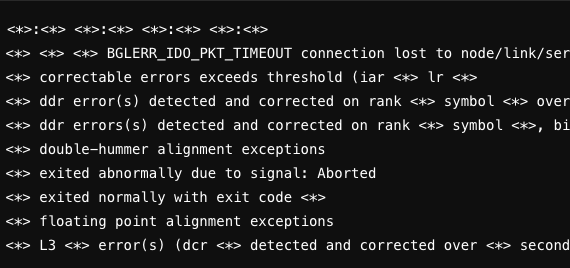


#### Part 2: Raw Logs

> The raw logs contain the actual log lines that need to be parsed.

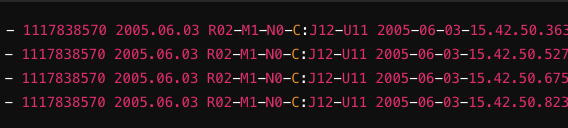

#### Part 3: Parsing Process

> The parsing process involves reading the raw logs and matching each line to a template. If a match is found, the relevant parts of the log line are extracted and used to populate fields in the parsed log.



---

## <font color = blue> 3. Parsed Output

In [11]:
import pandas as pd

# Define the file path
# parsed_file_path = '/home/sagemaker-user/11.Data/01.BGL/03.Parsed_CFDR/parsed.csv'
parsed_file_path = '/root/11.Data/01.BGL/03.Parsed_CFDR/parsed.csv'

# Load the data into a DataFrame
df = pd.read_csv(parsed_file_path, sep=';')

# Display basic information about the DataFrame
print("Basic Information:")
print(df.info())

# Display the first few lines of the DataFrame
print("\nFirst few lines:")
print(df.head(10))

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4747963 entries, 0 to 4747962
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          int64  
 1   event_type  int64  
 2   seq_id      object 
 3   time        float64
 4   label       object 
 5   eventlabel  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 217.3+ MB
None

First few lines:
   id  event_type               seq_id          time    label eventlabel
0   1         189  R02-M1-N0-C:J12-U11  1.117813e+09  Anomaly     Normal
1   2         189  R02-M1-N0-C:J12-U11  1.117813e+09  Anomaly     Normal
2   3         189  R02-M1-N0-C:J12-U11  1.117813e+09  Anomaly     Normal
3   4         189  R02-M1-N0-C:J12-U11  1.117813e+09  Anomaly     Normal
4   5         189  R02-M1-N0-C:J12-U11  1.117813e+09  Anomaly     Normal
5   6         189  R02-M1-N0-C:J12-U11  1.117813e+09  Anomaly     Normal
6   7         189  R02-M1-N0-C:J12-U11  1.117813e+09  Anomaly     Norma

---

## <font color = blue> 4. Parsed Logic

#### Part 1: Raw Log Line Example

- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.363779 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected

#### Part 2: Template Matching

> The parser code reads each template from the BGL_templates.csv file. Each template has placeholders (<*>) that can match various parts of a log line. Here’s an example template:

<*>:<*> <*>:<*> <*>:<*> <*>:<*>


#### <font color = tomato> Part 3: Parsing Function

1. Read Templates:

> * The templates are read from BGL_templates.csv and stored in a list.

2. Get Anomalous Sequences:

> * The parser identifies anomalous sequences by reading through the raw log file. <font color = red> Any log line with a label other than - is considered anomalous.

3. Parse Each Log Line:

> * For each log line, the parser tries to match it against each template.
> * If a match is found, it extracts the relevant parts (e.g., seq_id, timestamp, etc.).
> * If multiple templates match, the first one (or a specific one based on settings) is chosen.
> * If no match is found, a warning is printed.

4. Extract and Store Data:
> * The extracted data is written to a CSV file (parsed.csv) with columns such as id, event_type, seq_id, time, label, and eventlabel.


---

### <font color = teal> Example of Parsing a Log Line

##### <font color = blue>  Raw Log Line:


'- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.363779 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected'


#### 1. Split the Line:

> The line is split into parts based on spaces:

['-', '1117838570', '2005.06.03', 'R02-M1-N0-C:J12-U11', '2005-06-03-15.42.50.363779', 'R02-M1-N0-C:J12-U11', 'RAS', 'KERNEL', 'INFO', 'instruction', 'cache', 'parity', 'error', 'corrected']


#### 2. Identify seq_id and timestamp:

<font color = red>* seq_id is extracted as R02-M1-N0-C:J12-U11.
    
<font color = red>* timestamp is parsed from 2005-06-03-15.42.50.363779 and converted to a Unix timestamp.

#### 3. Match with Template:

> The parser tries to match the log line with each template. For example:

<*> <*> <*> BGLERR_IDO_PKT_TIMEOUT connection lost to node/link/service card

#### 4. Extract Labels:

* <font color = green> **label is set based on whether the seq_id is in anomalous_sequences.**
* eventlabel is extracted from the log line.

#### 5. Write to Parsed File:

> The parsed information is written to the parsed.csv file

#### 6. Final Parsed File

> The final parsed file has a structured format with columns that provide meaningful information extracted from the raw logs:

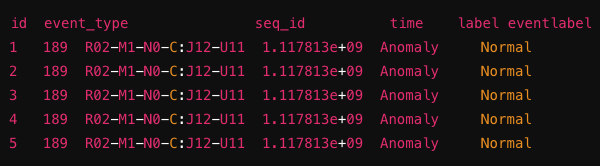

---

### <font color = teal> Label v/s EventLabel in the parsed file

#### Eventlabel
> The eventlabel is directly derived from the raw log line. It typically represents the initial status or type of event indicated in the log. For example, in the raw log line:

'- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.363779 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected'

> The eventlabel is extracted from the first part of the line, which in this case is -. The eventlabel gives a direct indication of the nature of the log event (e.g., INFO, ERROR, WARNING, etc.).

<font color = tomato> the first character '-' indicates normal. Anything else is an alert

#### Label

> The label is a more abstract classification derived from the context and additional processing of the log line. 

> In this specific parser logic, the label indicates whether the log entry is considered an Anomaly or Normal. 

> <font color = red>This determination is made by checking whether the seq_id (sequence identifier) is in the set of anomalous_sequences.

> Here's how the distinction works in the parsing logic:

>> Eventlabel Extraction:

>>> The eventlabel is directly taken from the log line. If the event indicator (e.g., -) is present, it is used as is. Otherwise, it might be normalized to Normal.

>> Label Determination:

>>> The label is set to Anomaly if the seq_id is found in the anomalous_sequences set; otherwise, it is set to Normal.

### <font color = teal> Example

> Consider the raw log line:

'- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.363779 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected'

> * eventlabel: - (indicating a normal informational message)

> * label: Anomaly (because R02-M1-N0-C:J12-U11 is in the set of anomalous sequences)

> Code Snippet

In [16]:
# eventlabel = line_parts[0]
# if eventlabel == '-':
#     eventlabel = 'Normal'
# if seq_id in anomalous_sequences:
#     label = "Anomaly"
# else:
#     label = "Normal"